# Tarea 4

**Envío del PR inicial:** lunes 26 de septiembre

**Aceptación del PR:** 

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos último incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

In [1]:
using Plots, PlotRecipes
pyplot()
using LaTeXStrings;

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
F_1(x)=x^2+0.25
F_1´(x)=2*x
F_2(x)=3*x*(1-x)
F_2´(x)=3-6*x
F_3(x)=exp(x-1)
F_3´(x)=exp(x-1)
F_4(x)=x^2-1.25
F_4´(x)=2*x
F_5(x)=exp(x+1)
F´_5(X)=exp(x+1);

In [3]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    #push!(xvec,x)
    for i in 1:m
        x=f(x)
        push!(xvec,x)
    end 
    return xvec
end 
        

iter_map (generic function with 1 method)

## Análisis de $ F_1(x)=x^2+0.25$


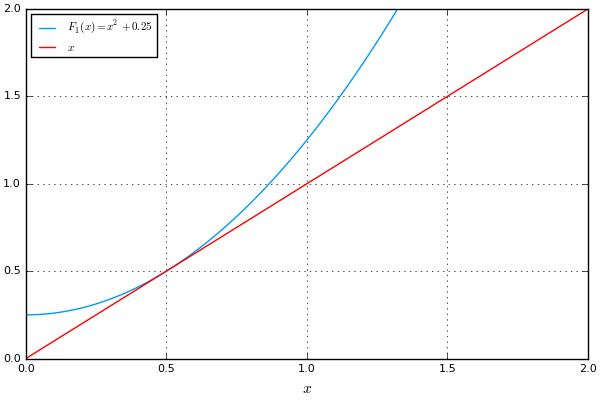

In [115]:
xrange=0:1/2^8:2
plot(xrange,F_1,ylim=(0,2),label=L"F_1(x)=x^2+0.25")
plot!(xrange,identity,color=:red,label=L"x")
xlabel!(L"x")


Resolviendo $x^2+0.25=x$ se obtiene que el punto fijo es $$x=\frac{1\pm\sqrt{0}}{2}=1/2$$
La derivada ahí vale 
$$F_1´(1/2)=1$$
Por tanto no es posible concluir si el punto fijo es atractivo o repulsivo. 
Para ello tomemos varias condiciones iniciales y veamos como evoluciona la distancia 
$$|f^n(x_0)-x^*|$$ con respecto a $n$.

Entonces **la estrategia a segir para las 5 funciones será** encontrar sus puntos fijos, luego iterar la función $n$ veces y graficar 

$$|f^n(x_0)-x^*| \ vs. \ n $$

In [5]:
m=400
x1=iter_map(F_1,0.,m)
x2=iter_map(F_1,0.48,m)
x3=iter_map(F_1,-0.39,m);
x1p=abs(x1-0.5)
x2p=abs(x2-0.5)
x3p=abs(x3-0.5);


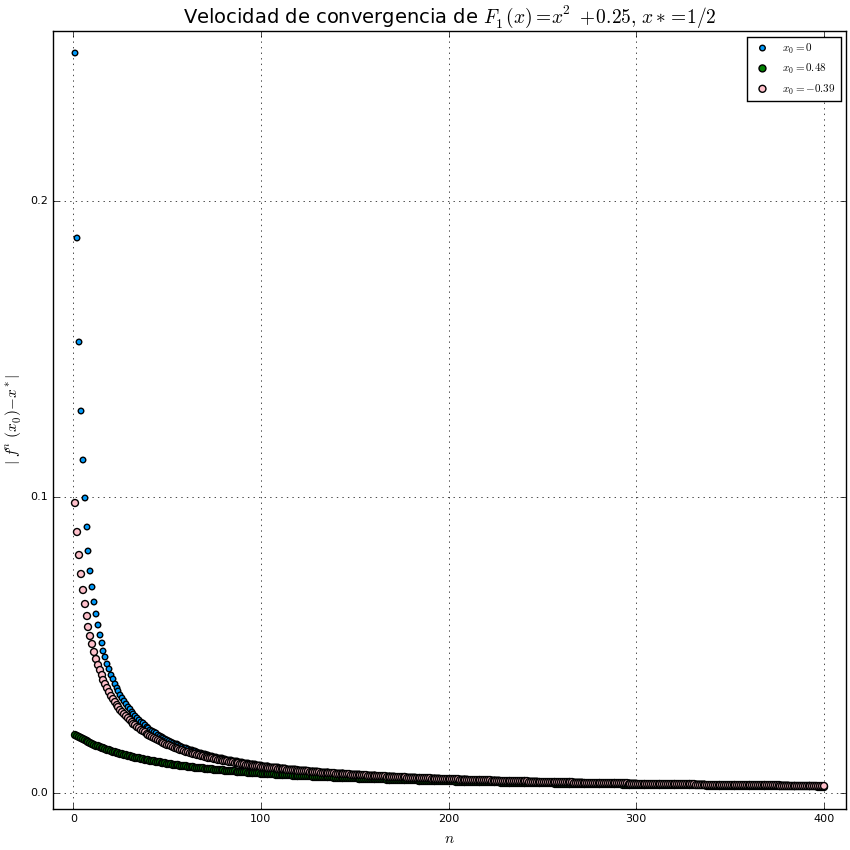

In [6]:
scatter(x1p,label=L"$x_0=0$",markersize=4,size=(850,850))
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")
title!(L"Velocidad de convergencia de $F_1(x)=x^2+0.25, \ x*=1/2 $")
scatter!(x2p,label=L"$x_0=0.48$",c=:green,markersize=5,size=(850,850))

scatter!(x3p,label=L"$x_0=-0.39$",c=:pink,markersize=5,size=(850,850))

In [7]:
N=111
x4=iter_map(F_1,0.51,N)
x5=iter_map(F_1,1.3,7)
x6=iter_map(F_1,-0.55,20);
x4p=abs(x4-0.5)
x5p=abs(x5-0.5)
x6p=abs(x6-0.5);


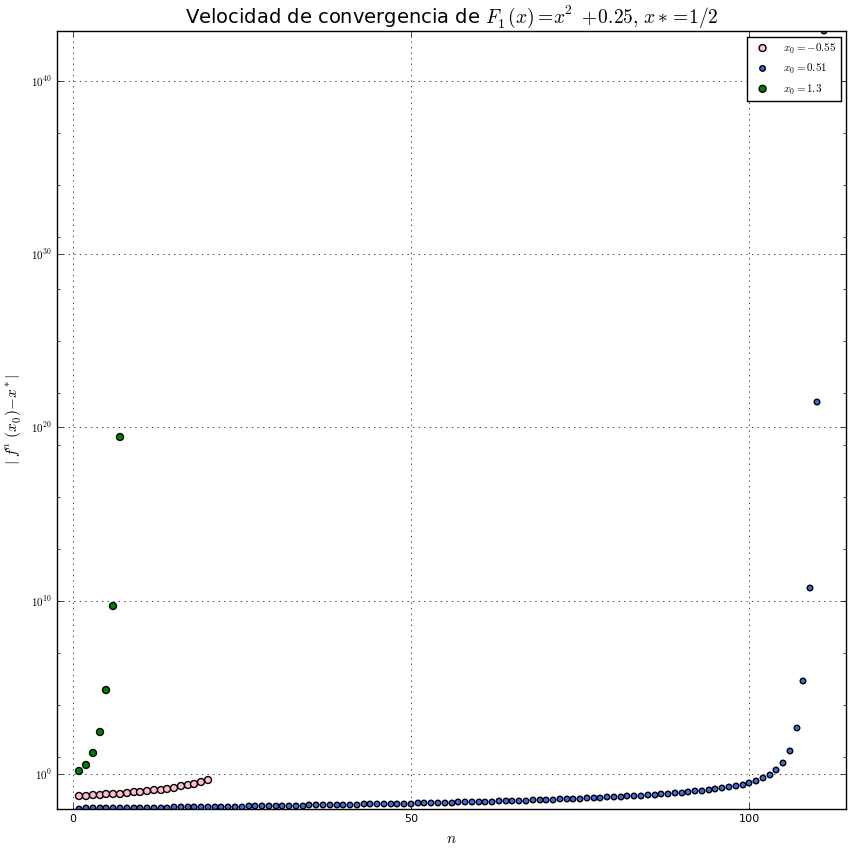

In [8]:
scatter(x6p,label=L"$x_0=-0.55$",c=:pink,markersize=5,size=(850,850))
scatter!(x4p,label=L"$x_0=0.51$",c=:royalblue,markersize=4,size=(850,850))
scatter!(x5p,label=L"$x_0=1.3$",c=:green,markersize=5,size=(850,850))
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")
title!(L"Velocidad de convergencia de $F_1(x)=x^2+0.25, \ x*=1/2 $")
yaxis!(:log10)

###Observaciones:
De la primera gráfica vemos que las distancias de las $x_n$ al punto fijo $x*$ a partir de las tres condiciones iniciales convergenn a cero. Esto quiere decir que para estas tres condiciones iniciales, el **punto fijo se comporta como un atractor**. Si observamos también las pendientes de las curvas dibujadas podemos hablar de la velociadad de convergencia y vemos que en valor absoluto, la condición inicial $x_0=0$ tiene la pendiente mas grande. Esto es que tal condición inicial converge más rápido al punti fijo. 
Entre más cercana al punto fijo esobservaremos que la convergencia es más lenta.

Por otro lado, si observamos la segunda gráfica vemos que para condiciones iniciales cuyo valor absoluto es mayor a 0.5 el punto fijo se comporta como un punto fijo repulsor y de nuevo entre más lejano esté la condición inicial, más rápido se alejan los iterados de el punto fijo. La escala logarítmica se utilizó para ver que en efecto, la velocidad de "divergencia" para estos puntos fijos, es brutal.

Con estas observaciones podemos ver que existe un intervalo de condiciones iniciales para las cuales el punto fijo $x^*=1/2$ se comporta como un atractor y fuera de este intervalo, el punto fijo es un repulsor. Esto es: 

$x^*$ es punto fijo atractor $\forall x_0 \in [-0.5,0.5]$

$x^*$ es punto fijo repulsor $\forall x_0 \notin [-0.5,0.5]$

## Análisis de  $F_2(x) = 3x(1-x)$


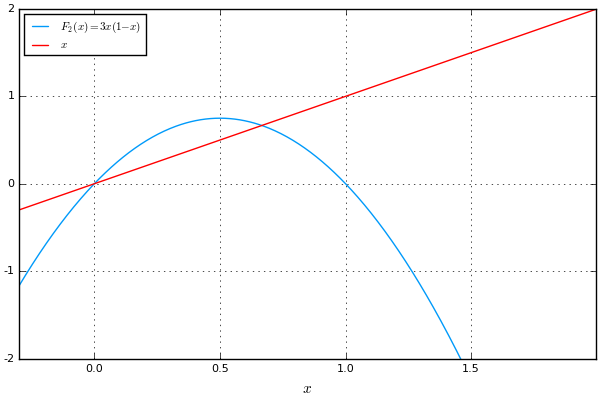

In [113]:
xrange=-0.3:1/2^8:2
plot(xrange,F_2,ylim=(-2,2),label=L"F_2(x)=3x(1-x)")
plot!(xrange,identity,color=:red,label=L"x")
xlabel!(L"x")


$F_2$ tiene dos puntos fijos, como se puede observar de la intersección de su gráfica con la identidad.
Resolviendo $3x(1-x)=x$ se obtiene que los puntos fijos son:
$$x_1^*=0 \ , \ x_2^*=2/3$$

La derivada del mapeo es $F´(x)=3-6x$, que evaluada en los puntos fijos, da:

$$F´(x_1^*)=3 \ , F´(x_2^*)=-1$$

Por lo tanto $x_1^*$ **es un repulsor** y para el segundo no podemos concluir si es atractor o repulsor. Hagamos el análisis de la velocidad de convergencia e iteremos las condiciones iniciales $x_0=0.25,0.5,0.75,-0.1,1.49,1.5$

In [110]:
m=50
x1=iter_map(F_2,0.25,m)
x2=iter_map(F_2,0.5,m)
x3=iter_map(F_2,0.75,m)
x4=iter_map(F_2,-0.4,6) #diverge
x5=iter_map(F_2,1.1,6) #superestable??
x6=iter_map(F_2,1.5,6);#explota
x1p=abs(x1-2/3)
x2p=abs(x2-2/3)
x3p=abs(x3-2/3)
x4p=abs(x4-2/3)
x5p=abs(x5-2/3)
x6p=abs(x6-2/3);


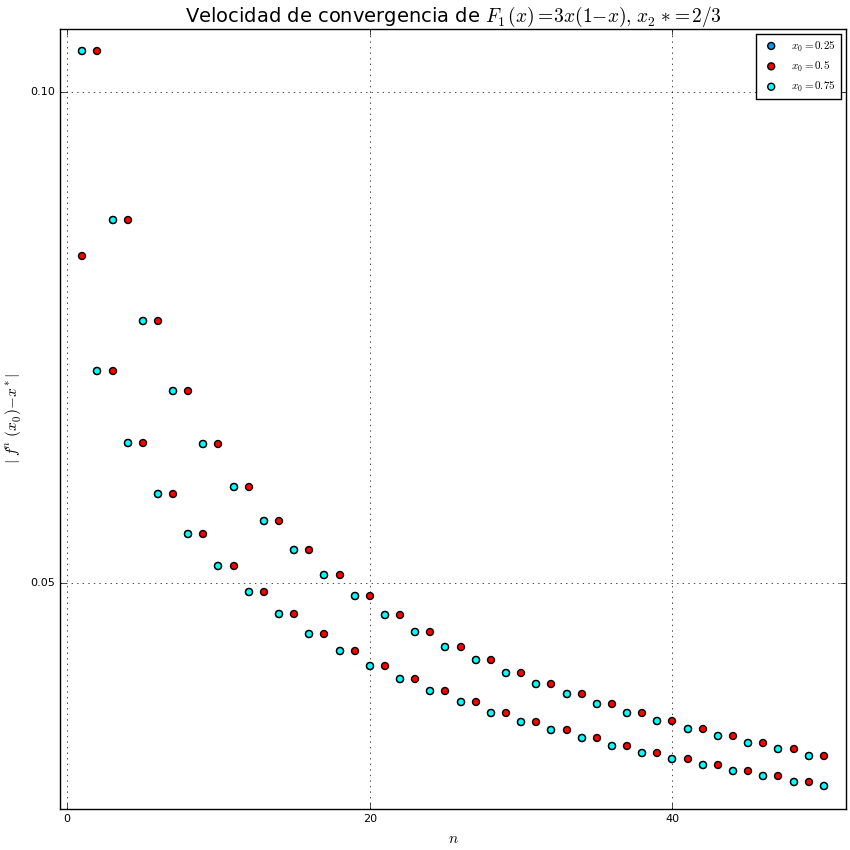

In [114]:
scatter(x1p,label=L"$x_0=0.25$",markersize=5,size=(850,850),)
scatter!(x2p,c=:red,label=L"x_0=0.5",markersize=5,size=(850,850))
scatter!(x3p,c=:cyan,label=L"x_0=0.75",markersize=5,size=(850,850))
title!(L"Velocidad de convergencia de $F_2(x)=3x(1-x), \ x_2*=2/3 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")


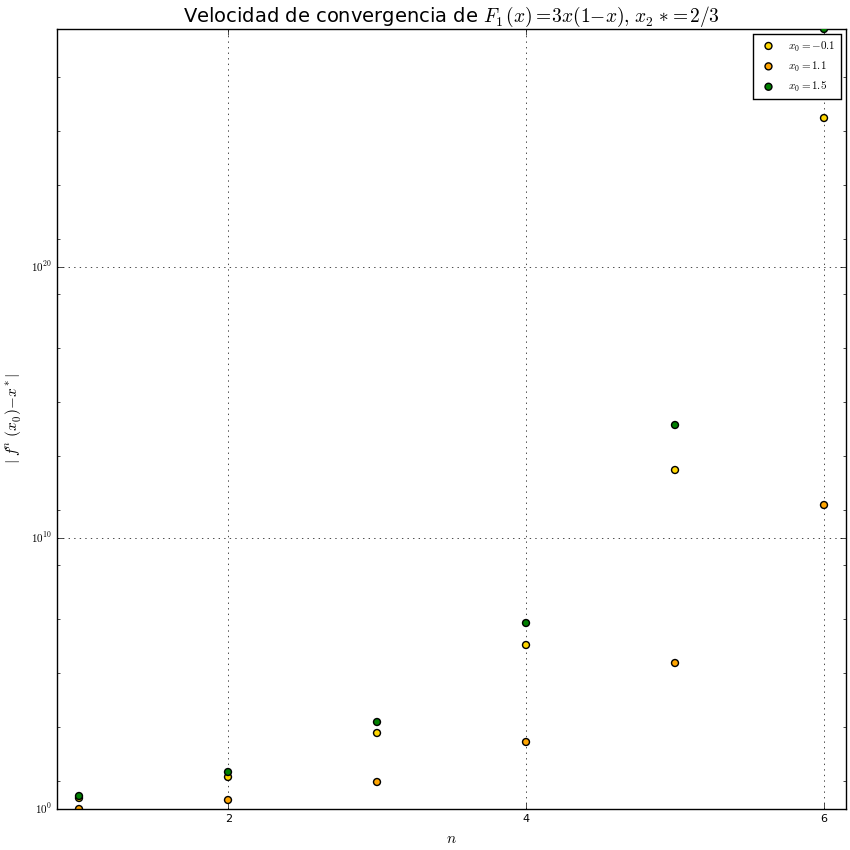

In [116]:
scatter(x4p,yaxis=(:log10),c=:gold,label=L"x_0=-0.1",markersize=5,size=(850,850))
scatter!(x5p,c=:orange,label=L"x_0=1.1",markersize=5,size=(850,850))
scatter!(x6p,c=:green,label=L"x_0=1.5",markersize=5,size=(850,850))
title!(L"Velocidad de convergencia de $F_2(x)=3x(1-x), \ x_2*=2/3 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")


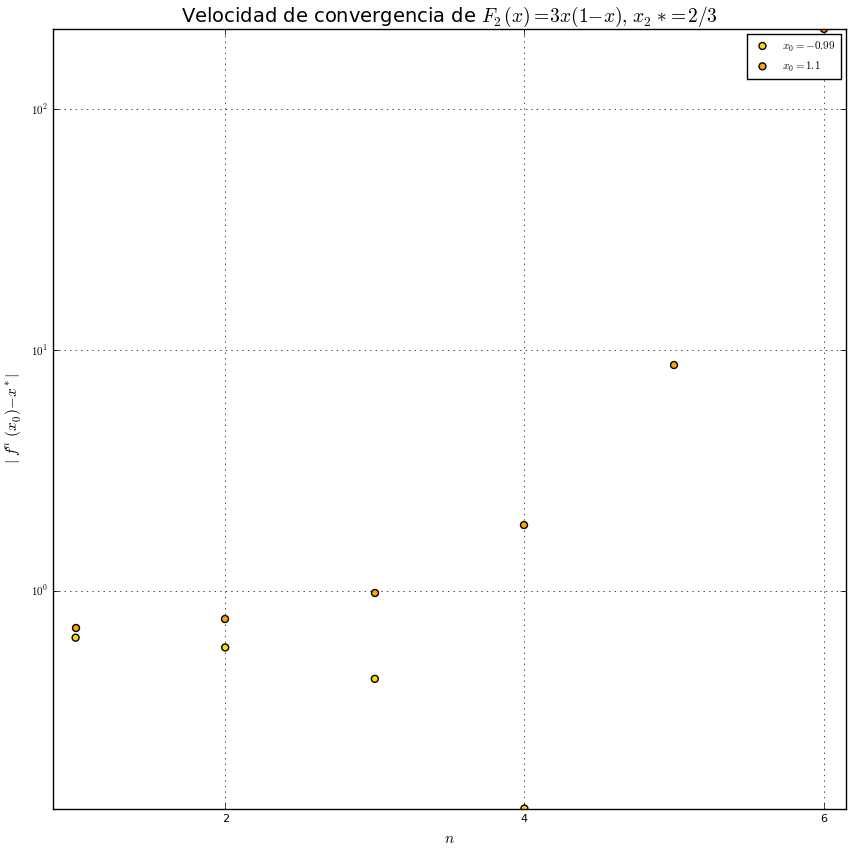

In [159]:
x7=iter_map(F_2,0.99,4)
x8=iter_map(F_2,1.01,6) 
x7p=abs(x7-2/3)
x8p=abs(x8-2/3)
scatter(x7p,yaxis=(:log10),c=:gold,label=L"x_0=-0.99",markersize=5,size=(850,850))
scatter!(x8p,c=:orange,label=L"x_0=1.1",markersize=5,size=(850,850))
title!(L"Velocidad de convergencia de $F_2(x)=3x(1-x), \ x_2*=2/3 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

De estas tres gréaficas vemos que el punto fijo $x_2^*=2/3$ se comporta como atractor para condiciones iniciales $x_0$ que satisfacen:

$$x_0 \in (0,1)$$

y para condiciones iniciales fuera de este intervalo el punto fijo se comporta como repulsor.

Notemos también que $x_0=0$ y $x_0=1$ son puntos super estables pues $F(0)=0$ y $F(1)=0$, y que estos corresponden a los puntos en donde la órbita cambia de estabilidad de atractora a repulsora.

## Análisis de $F_3(x)=exp(x-1)$


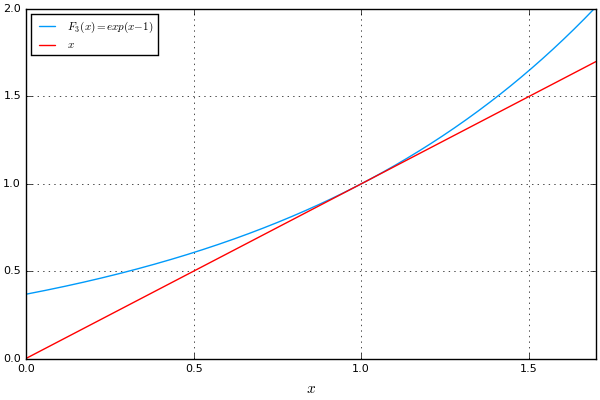

In [118]:
xrange=0:1/2^8:1.7
plot(xrange,F_3,ylim=(0,2),label=L"F_3(x)=exp(x-1)")
plot!(xrange,identity,color=:red,label=L"x")
xlabel!(L"x")

Para encontrar los puntos fijos que son soución a 

$$F_3(x^*)=exp(x^*-1)=x^*$$

definamos la función $$G_3(x)=exp(x-1)-x$$ y encontremos sus raíces con el método de Newton definido a continuación.

In [136]:
"""Método de Newton para una función F(x) cond erivada F´(x), se itera m veces a partir de una 
condición inicial x0."""
function newton(f,f´,x_0,m)
    x=x_0
    for i in 1:m
        x=x-(f(x))/f´(x)  
    end 
    return x
end 

newton (generic function with 1 method)

In [134]:
G3(x)=exp(x-1)-x
G3´(x)=exp(x-1)-1;


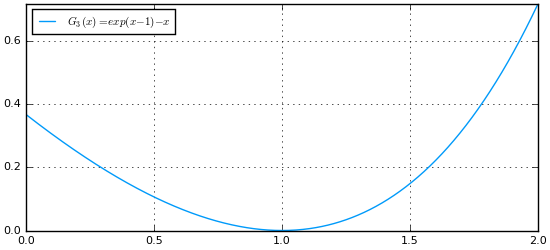

In [152]:
xrange=-0:1/2^8:2
plot(xrange,G3,label=L"G_3(x)=exp(x-1)-x",size=(550,250))

De la gráfica anterior vemos que la raíz esta en $x=1$. Comprobando con el método de Newton obtenemos:

In [150]:
newton(G3,G3´,1.2,1000)

1.0000000034975847

Luego, el punto fijo de $F_3$ es $x^*=1$ y ahí la derivada del mapeo $F_3´(1)=1$. Por lo tanto debemos explorar si éste se comporta como atractor o repulsor para algunas condiciones iniciales.

In [193]:
m=20
x1=iter_map(F_3,1.1,m)
x2=iter_map(F_3,0.9,m)
x3=iter_map(F_3,0.,m)
x4=iter_map(F_3,1.5,3) #diverge
x5=iter_map(F_3,0.5,30) #superestable??
x6=iter_map(F_3,-10.,10);#explota
xf=1
x1p=abs(x1-xf)
x2p=abs(x2-xf)
x3p=abs(x3-xf)
x4p=abs(x4-xf)
x5p=abs(x5-xf)
x6p=abs(x6-xf);


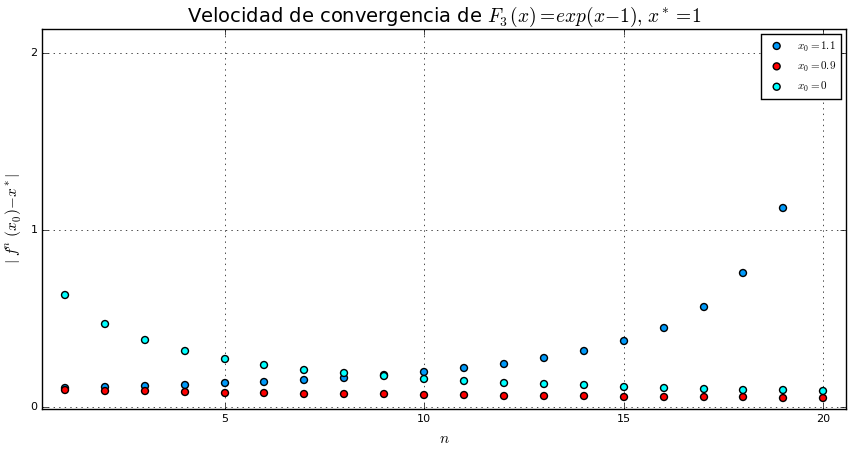

In [214]:
scatter(x1p,label=L"$x_0=1.1$",markersize=5,size=(850,450),)
scatter!(x2p,c=:red,label=L"x_0=0.9",markersize=5,size=(850,450))
scatter!(x3p,c=:cyan,label=L"x_0=0",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_3(x)=exp(x-1), \ x^*=1 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")


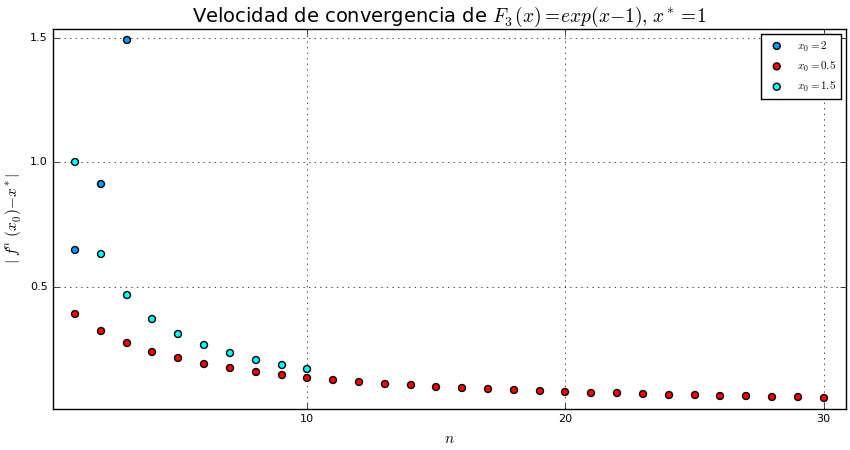

In [218]:
scatter(x4p,label=L"$x_0=2$",markersize=5,size=(850,450),)
scatter!(x5p,c=:red,label=L"x_0=0.5",markersize=5,size=(850,450))
scatter!(x6p,c=:cyan,label=L"x_0=1.5",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_3(x)=exp(x-1), \ x^*=1$")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

La velocidad de convergencia de esta función esta determnada por cuánto esten las condiciones iniciales cerca del punto fijo. En este caso toda $x_0\geq1$ termina divergiendo, es decir que el punto fijo $x^*=1$ es repulsivo para estas condiciones inciales y atractivo para los $x_0\leq1$. Además entre más cerca se esté del punto fijo la velocidad de convergencia  correspondiente a las las pendientes de las curvas pintadas

## Análisis de $F_4(x)=x^2-1.25$


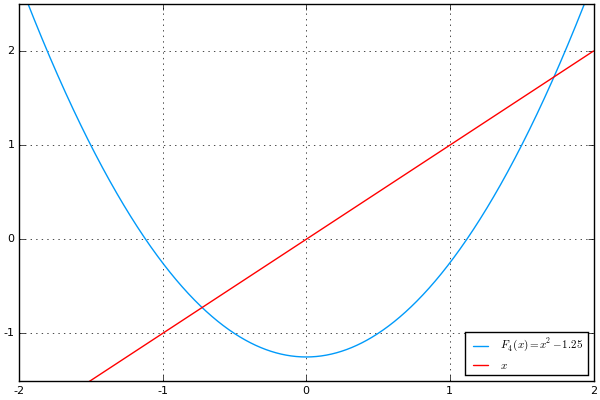

In [20]:
xrange=-2:1/2^8:2
plot(xrange,F_4,ylim=(-1.5,2.5),label=L"F_4(x)=x^2-1.25")
plot!(xrange,identity,color=:red,label=L"x")

Cuyos puntos fijos son:

$$x_{1,2}^*=1/2\pm 1/2\sqrt{6}$$

In [199]:
G4(x)=x^2-1.25-x
G4´(x)=2x-1

G4´ (generic function with 1 method)

In [212]:
xfix1=newton(G4,G4´,-0.5,20) #enctontramos los puntos fijos
xfix2=newton(G4,G4´,1.5,20)
xfix1,xfix2

(-0.724744871391589,1.7247448713915892)

In [210]:
F_4´(xfix1),F_4´(xfix2)

(-1.449489742783178,3.4494897427831783)

La derivada de $F_4$ vale en los puntos fijos 

$$F_4(x_1^*)=-1.4494.. , \ F_4(x_2^*)=3.4494...$$

por tanto, ambos son repulsores, pero es de interés estudiar la velocidad de convergencia de las condiciones iniciales que están en el intervalo 

$$x_0\in (x_1^*,x_2^*)$$

In [310]:
m=25
x1=iter_map(F_4,xfix2-0.1,m)
x2=iter_map(F_4,xfix1+0.1,m)
x3=iter_map(F_4,0.,m)
x4=iter_map(F_4,0.5,m)
x5=iter_map(F_4,-3.,7) 
x6=iter_map(F_4,xfix2+0.1,7);
xf=xfix2
xf=xfix1
x1p=abs(x1-xf)
x2p=abs(x2-xf)
x3p=abs(x3-xf)
x4p=abs(x4-xf)
x5p=abs(x5-xfix1)
x6p=abs(x6-xfix2);


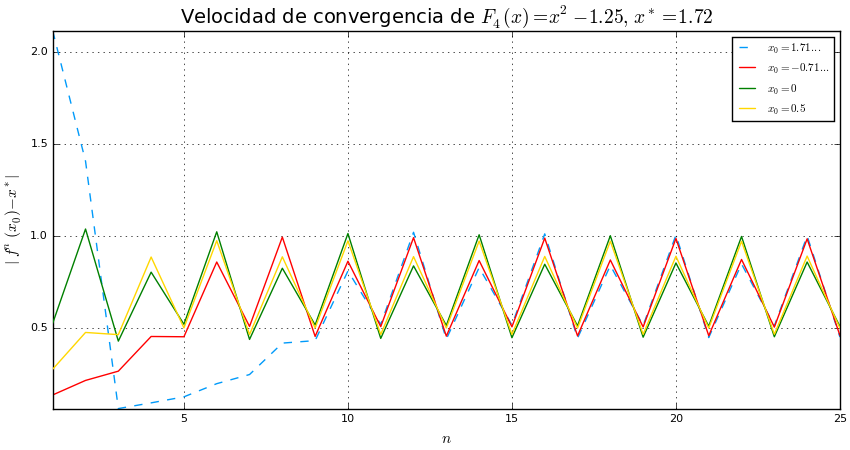

In [313]:
plot(x1p,label=L"$x_0=1.71...$",markersize=5,size=(850,450),l=(1,:dash))
plot!(x2p,c=:red,label=L"x_0=-0.71...",markersize=5,size=(850,450))
plot!(x3p,c=:green,label=L"x_0=0",markersize=5,size=(850,450))
plot!(x4p,c=:gold,label=L"x_0=0.5",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_4(x)=x^2-1.25, \ x^*=1.72 $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

Vemos que para estas condiciones iniciales, las distancias $|F^n_5(x_0)-x^*|$, oscilan y no caen a cero. Esto quiere decir que todas las condiciones iniciales $x_0\in (x_1^*,x_2^*)$, caen en órbitas periódicas de periodo 2 pues las distancias solo oscilan entre dos valores.


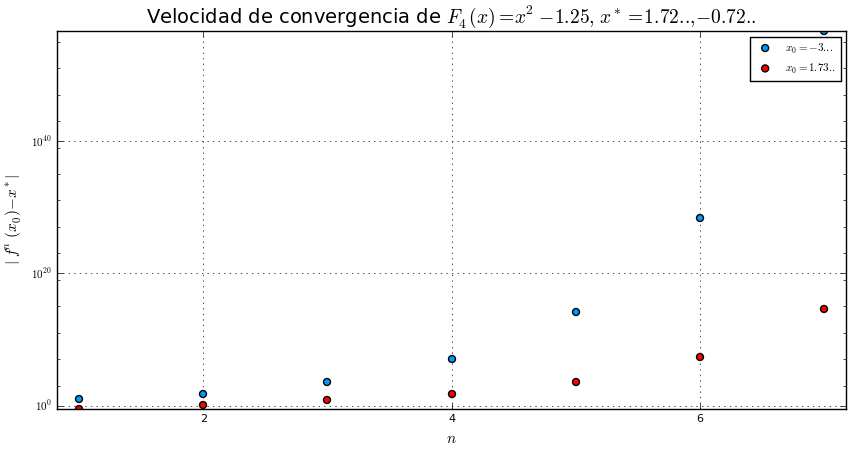

In [295]:
scatter(x5p,yaxis=(:log10),label=L"$x_0=-3...$",markersize=5,size=(850,450),)
scatter!(x6p,c=:red,label=L"x_0=1.73..",markersize=5,size=(850,450))
title!(L"Velocidad de convergencia de $F_4(x)=x^2-1.25, \ x^*=1.72..,-0.72.. $")
ylabel!(L"$| \ f^n (x_0)-x^{*}|$")
xlabel!(L"n")

Vemos que para estas condiciones iniciales, el mapeo diverge.

##Análisis de $F_5(x)=exp(x+1)$


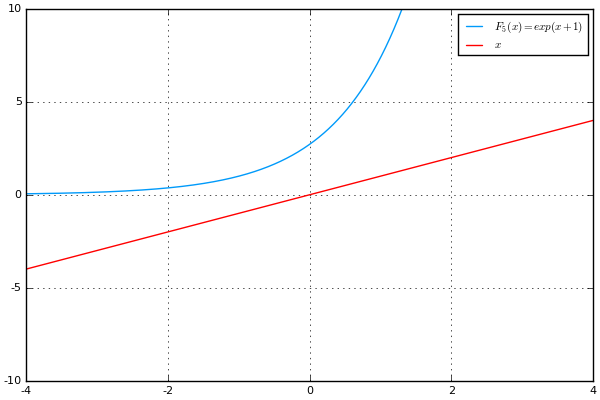

In [22]:
xrange=-4:1/2^8:4
plot(xrange,F_5,ylim=(-10,10),label=L"F_5(x)=exp(x+1)")
plot!(xrange,identity,color=:red,label=L"x")

Como se observa en la gráfica, $F_5(x)$ no tiene puntos fijos.
Por lo que solo hay un punto al que se va el mapeo después de muchos iterados ($n\rightarrow \infty$)

$$ \ F^n_5(x) \rightarrow \infty$$

In [232]:
iter_map(F_5,-0.5,5)

5-element Array{Float64,1}:
   1.64872  
  14.136    
   3.74507e6
 Inf        
 Inf        

In [233]:
iter_map(F_5,-30000.,5)

5-element Array{Float64,1}:
   0.0       
   2.71828   
  41.1936    
   2.11071e18
 Inf         

In [234]:
iter_map(F_5,-1.,5)

5-element Array{Float64,1}:
    1.0    
    7.38906
 4398.66   
  Inf      
  Inf      

In [235]:
iter_map(F_5,4.,5)

5-element Array{Float64,1}:
 148.413     
   7.75016e64
 Inf         
 Inf         
 Inf         

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.



*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [33]:
#using PyPlot;

In [1]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) n: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(f,crange,n,x0,Nlast)
diagBif=Float64[]
cs=Float64[]
    for c in crange
        Q(x)=f(x,c)
        x=iter_map(Q,x0,n)
        for i in 0:Nlast
            push!(cs,c)
            bif=x[end-i]
            push!(diagBif,bif)
        end
    end
        return cs,diagBif   
end 

Bif_diag (generic function with 1 method)

In [6]:
ces=-2:1/2^10:0.25
Qc(x,c)=x^2+c

Qc (generic function with 1 method)

In [7]:
ces=-2:1/2^10:0.25
Qc(x,c)=x^2+c
Qc´(x)=2x
x0=0.01
n=10000
Nlast=500;

In [8]:
cs,diagBif=Bif_diag(Qc,ces,n,x0,Nlast);

In [58]:
cero(x)=0

cero (generic function with 1 method)


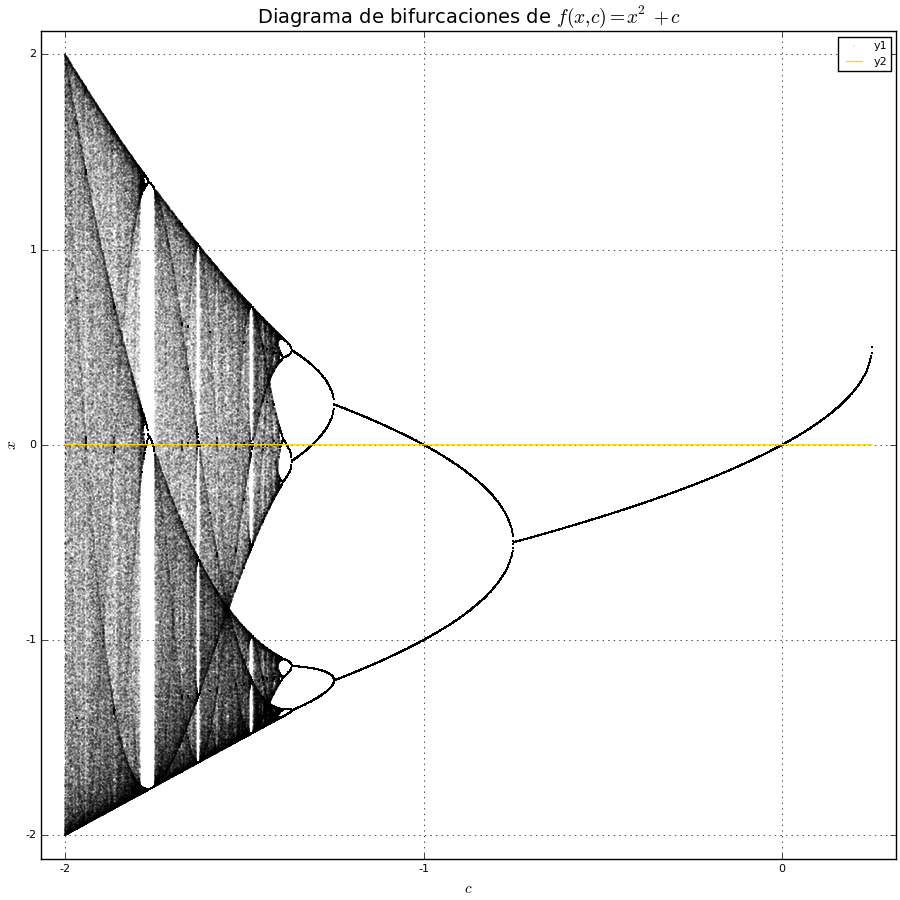

In [60]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,cero,c=:gold)

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

**Ejercicio 3:**

Como se ve en la Fig. 1, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.

In [ ]:
"""Función que evalua el coeficiente de lyapunov de un mapeo f(x,c) a partir de una condición 
inicial x0, con n iterados. Observación: para que de una buena aproximación n tiene que ser 
grande.
En sus argumentos se debe incluir la función f y su derivada f'"""
function lyapunov(f,f´,x0,n)
    xx=iter_map(f,x0,n)
    fpr=f´(xx)
    lyap=(1/n)*(sum(log(abs(fpr))))
    return lyap
end 
    